# Capstone Project - The Battle of Neighborhoods (Week 1-2)

## Business Problem section: Analysis of Restaraunts in 31 Major European Cities using data from TripAdvisor


Before I visit a restaraunt, I like to look it up and check out the menu, reviews, and ratings. So I thought this would be a fun dataset to work with to find where to eat in Europe. I also did some Sentiment Analysis to the reviews available in this data set to see what reviewers mostly say.

You could be on a budget, could be looking for a top rated restaraunt in town, finding a healthy food restaraunt, or looking to see where to have the best cup of coffee. So let's see what I can find!

## Data Section

This dataset has been obtained by scraping TA (the famous tourism website) for information about restaurants for a given city.
The scraper goes through the restaurants listing pages and fulfills a raw dataset.
The raw datasets for the main cities in Europe have been then curated for futher analysis purposes, and aggregated to obtain this dataset.

IMPORTANT: the restaurants list contains the restaurants that are registrered in the TA database only. All the 
restaurants of a city may not be resgistered in this database.

https://www.kaggle.com/damienbeneschi/krakow-ta-restaurans-data-raw

The dataset contain restaurants information for 31 cities in Europe: Amsterdam (NL), Athens (GR) , Barcelona (ES) , Berlin (DE), Bratislava (SK), Bruxelles (BE), Budapest (HU), Copenhagen (DK), Dublin (IE), Edinburgh (UK), Geneva (CH), Helsinki (FI), Hamburg (DE), Krakow (PL), Lisbon (PT), Ljubljana (SI), London (UK), Luxembourg (LU), Madrid (ES), Lyon (FR), Milan (IT), Munich (DE), Oporto (PT), Oslo (NO), Paris (FR), Prague (CZ), Rome (IT), Stockholm (SE), Vienna (AT), Warsaw (PL), Zurich (CH).

The data is a .csv file comma-separated that contains 125 433 entries (restaurants). It is structured as follow:
Name: name of the restaurant
City: city location of the restaurant
Cuisine Style: cuisine style(s) of the restaurant, in a Python list object (94 046 non-null)
Ranking: rank of the restaurant among the total number of restaurants in the city as a float object (115 645 non-null)
Rating: rate of the restaurant on a scale from 1 to 5, as a float object (115 658 non-null)
Price Range: price range of the restaurant among 3 categories , as a categorical type (77 555 non-null)
Number of Reviews: number of reviews that customers have let to the restaurant, as a float object (108 020 non-null)
Reviews: 2 reviews that are displayed on the restaurants scrolling page of the city, as a list of list object where the first list contains the 2 reviews, and the second le dates when these reviews were written (115 673 non-null)
URL_TA: part of the URL of the detailed restaurant page that comes after 'www.tripadvisor.com' as a string object (124 995 non-null)
ID_TA: identification of the restaurant in the TA database constructed a one letter and a number (124 995 non-null)

Missing information for restaurants (for example unrated or unreviewed restaurants) are in the dataset as NaN (numpy.nan).

## Methodology section




The Methodology section will describe the main components of our analysis and predication system. The Methodology section comprises four stages:

1. Collect Inspection Data
2. Explore and Understand Data
3. Data preparation and preprocessing 
4. Modeling



##### 1. Collect Inspection Data

After importing the necessary libraries, we download the data from the HM Land Registry website as follows:

In [1]:
import os # Operating System
import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes
import folium #import folium # map rendering library

print('Libraries imported.')




# >>>>>>>>>>>>>>>>>>>>>> ERROR REPORT <<<<<<<<<<<<<<<<<<<<<<

    Traceback (most recent call last):
      File "/home/hmd/anaconda3/lib/python3.6/site-packages/urllib3/response.py", line 685, in _update_chunk_length
        self.chunk_left = int(line, 16)
    ValueError: invalid literal for int() with base 16: b''
    
    During handling of the above exception, another exception occurred:
    
    Traceback (most recent call last):
      File "/home/hmd/anaconda3/lib/python3.6/site-packages/urllib3/response.py", line 425, in _error_catcher
        yield
      File "/home/hmd/anaconda3/lib/python3.6/site-packages/urllib3/response.py", line 752, in read_chunked
        self._update_chunk_length()
      File "/home/hmd/anaconda3/lib/python3.6/site-packages/urllib3/response.py", line 689, in _update_chunk_length
        raise httplib.IncompleteRead(line)
    http.client.IncompleteRead: IncompleteRead(0 bytes read)
    
    During handling of the above exception, another exception occurr

Upload successful.
Solving environment: done

## Package Plan ##

  environment location: /home/hmd/anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/linux-64::python_abi-3.6-1_cp36m

The following packages will be UPDATED:

  ca-certificates     pkgs/main::ca-certificates-2020.1.1-0 --> conda-forge::ca-certificates-2020.4.5.1-hecc5488_0
  conda                       pkgs/main::conda-4.8.3-py36_0 --> 

In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import operator
from matplotlib import cm
from itertools import cycle, islice
%matplotlib inline

import os
print(os.listdir("/home/hmd/Documents"))

['TA_restaurants_curated.csv.zip', 'TA_restaurants_curated1.csv']


In [70]:
#Read the data for examination (Source: http://landregistry.data.gov.uk/)
df_ppd = pd.read_csv("/home/hmd/Documents/TA_restaurants_curated1.csv", engine ='python')


Before using data, we will have to explore and understand it.


##### 2. Explore and Understand Data

In [71]:
df_ppd.head(5)

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [72]:
df_ppd.shape

(125527, 11)

In [73]:
df_ppd.describe()

,Unnamed: 0,Ranking,Rating,Number of Reviews
count,125527.000000,115876.000000,115897.000000,108183.000000
mean,3974.686131,3657.463979,3.987441,125.184983
std,4057.687698,3706.255301,0.678814,310.833311
min,0.000000,1.000000,-1.000000,2.000000
25%,1042.000000,965.000000,3.500000,9.000000
50%,2445.000000,2256.000000,4.000000,32.000000
75%,5626.000000,5237.000000,4.500000,114.000000
max,18211.000000,16444.000000,5.000000,16478.000000


In [74]:
df_ppd.columns


Index(['Unnamed: 0', 'Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

##### 3. Data preparation and preprocessing

In [79]:
#Lets see if we can remove certain columns
df_ppd.drop(df_ppd.columns[[0, 4]], axis = 1, inplace=True,  errors='raise')
df_ppd.head()

,City,Cuisine Style,Rating,Number of Reviews,Reviews,URL_TA,ID_TA
0,Amsterdam,"['French', 'Dutch', 'European']",5.0,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",4.5,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,Amsterdam,"['Mediterranean', 'French', 'International', '...",4.5,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,Amsterdam,"['French', 'European', 'International', 'Conte...",5.0,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",4.5,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [80]:
df_ppd.count()

City                 125527
Cuisine Style         94176
Rating               115897
Number of Reviews    108183
Reviews              115911
URL_TA               125527
ID_TA                125527
dtype: int64

In [81]:
df_ppd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               125527 non-null  object 
 1   Cuisine Style      94176 non-null   object 
 2   Rating             115897 non-null  float64
 3   Number of Reviews  108183 non-null  float64
 4   Reviews            115911 non-null  object 
 5   URL_TA             125527 non-null  object 
 6   ID_TA              125527 non-null  object 
dtypes: float64(2), object(5)
memory usage: 6.7+ MB


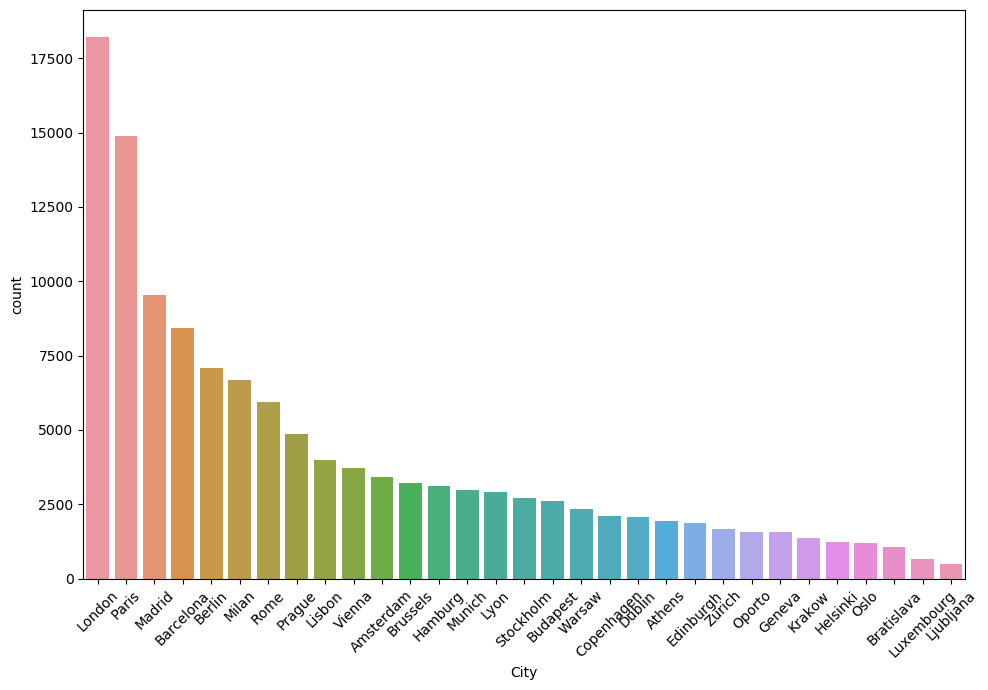

In [83]:


plt.figure(figsize=(10,7), dpi =100)
plot = sns.countplot(df_ppd['City'], order=df_ppd['City'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
plt.tight_layout()




we can see that London and Paris have the highest number of reviews 
&
Ljubljana, Luxenbourg have the least number of reviews

Lets try to groupby the city

In [85]:
byCity = df_ppd.groupby('City')
byCity['Rating'].mean()

City
Amsterdam     4.118381
Athens        4.207774
Barcelona     3.966829
Berlin        4.127020
Bratislava    3.989314
Brussels      3.890106
Budapest      4.095854
Copenhagen    3.994670
Dublin        4.051151
Edinburgh     4.056818
Geneva        3.969482
Hamburg       4.030508
Helsinki      3.908813
Krakow        4.128812
Lisbon        4.052128
Ljubljana     4.128205
London        3.942896
Luxembourg    3.909310
Lyon          3.920382
Madrid        3.796698
Milan         3.808955
Munich        4.027525
Oporto        4.152145
Oslo          3.899385
Paris         3.948714
Prague        4.013423
Rome          4.232140
Stockholm     3.873528
Vienna        4.067984
Warsaw        4.067102
Zurich        4.018495
Name: Rating, dtype: float64

Takeaway: Almost all of the cities have a good avg restaurtant rating.

Text(0, 0.5, 'Average Review Rating')

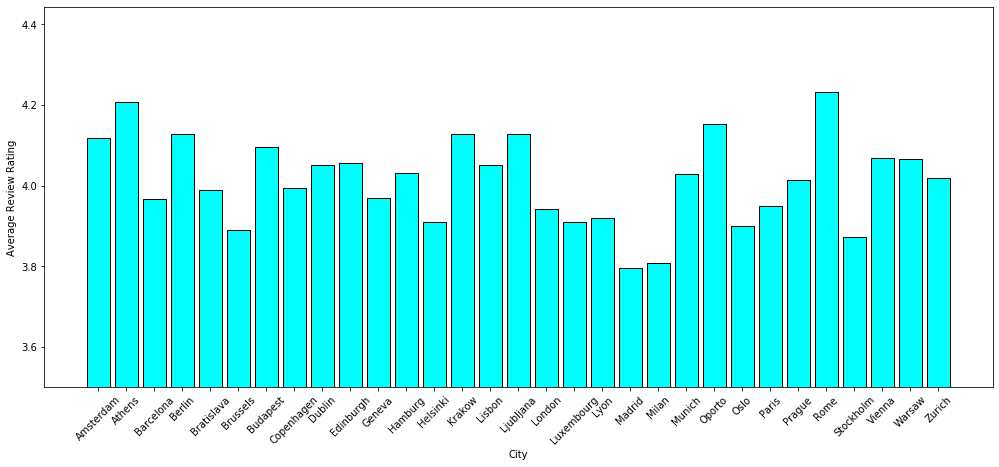

In [88]:
#Average Review Rating per City

x = list()
y = list()
for city in list(df_ppd['City'].unique()):
    x.append(city)
    y.append(df_ppd[df_ppd['City'] == city]['Rating'].mean())
fig, ax = plt.subplots(1,1,figsize=(17,7))
ax.bar(x,y,color = 'cyan',edgecolor = 'black')
ax.set_ylim(bottom=3.5)
ax.set_xticklabels(labels = x, rotation = 45)
ax.set_xlabel('City')
ax.set_ylabel('Average Review Rating')

Madrid & Milan seem to have the lowest average rating, Rome & Athens seem to have the highest average rating

Text(0, 0.5, 'Min Review Rating')

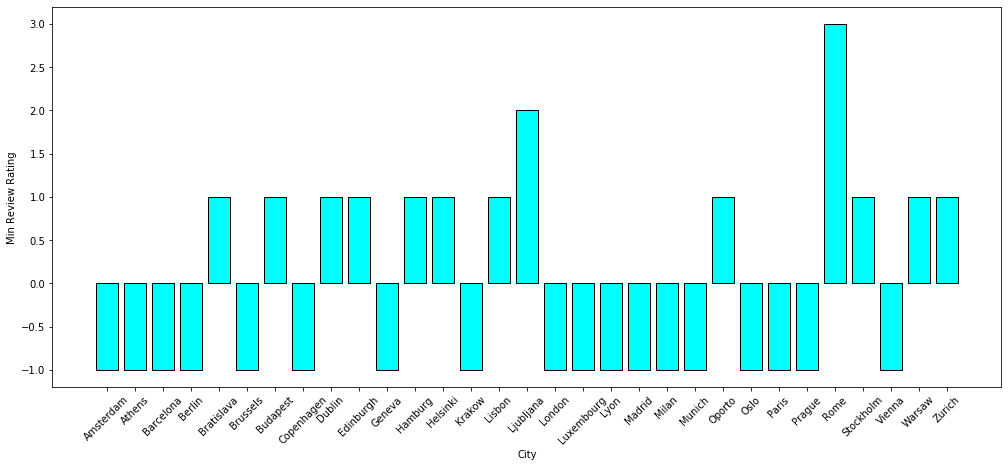

In [92]:
### Min Review rating per city


x = list()
y = list()
for city in list(df_ppd['City'].unique()):
    x.append(city)
    y.append(df_ppd[df_ppd['City'] == city]['Rating'].min())
fig, ax = plt.subplots(1,1,figsize=(17,7))
ax.bar(x,y,color = 'cyan',edgecolor = 'black')
ax.set_xticklabels(labels = x, rotation = 45)
ax.set_xlabel('City')
ax.set_ylabel('Min Review Rating')




few cities have "Negative (-1) Rating".
Rome seems to have best ratings amongst all the cities.

In [94]:
#Lets look at the Negative Ratings
print('Total negative ratings count : ', len(df_ppd[df_ppd['Rating'] < 0]))
df_ppd[df_ppd['Rating'] < 0]


Total negative ratings count :  41


,City,Cuisine Style,Rating,Number of Reviews,Reviews,URL_TA,ID_TA
3239,Amsterdam,"['Caribbean', 'Jamaican']",-1.0,NaN,"[['A TRUE BLESSING FOR YOUR STOMACH'], ['01/10...",/Restaurant_Review-g188590-d12291891-Reviews-R...,d12291891
3240,Amsterdam,"['French', 'European', 'Fusion', 'Street Food'...",-1.0,NaN,"[[], []]",/Restaurant_Review-g188590-d12333583-Reviews-L...,d12333583
3241,Amsterdam,"['Dutch', 'European']",-1.0,NaN,"[['Bistro is changing!'], ['01/09/2018']]",/Restaurant_Review-g188590-d13276050-Reviews-B...,d13276050
3242,Amsterdam,"['French', 'German', 'Belgian', 'Dutch', 'Euro...",-1.0,NaN,"[['Might look good on socialMedia, sucks in r....",/Restaurant_Review-g188590-d13331300-Reviews-F...,d13331300
3247,Amsterdam,"['Bar', 'Barbecue', 'Grill', 'Pub']",-1.0,NaN,"[[], []]",/Restaurant_Review-g188590-d13356735-Reviews-P...,d13356735
5221,Athens,NaN,-1.0,NaN,"[[], []]",/Restaurant_Review-g189400-d13355256-Reviews-S...,d13355256
13155,Barcelona,"['International', 'Spanish']",-1.0,NaN,"[[], []]",/Restaurant_Review-g187497-d13173275-Reviews-L...,d13173275
13156,Barcelona,['Italian'],-1.0,NaN,"[[], []]",/Restaurant_Review-g187497-d13199631-Reviews-L...,d13199631
13158,Barcelona,"['Pizza', 'Mediterranean', 'Italian']",-1.0,2.0,"[[], []]",/Restaurant_Review-g187497-d13329685-Reviews-V...,d13329685
20159,Berlin,"['German', 'African']",-1.0,NaN,"[[], []]",/Restaurant_Review-g187323-d12249169-Reviews-C...,d12249169


Text(0, 0.5, 'Count of Negative Ratings')

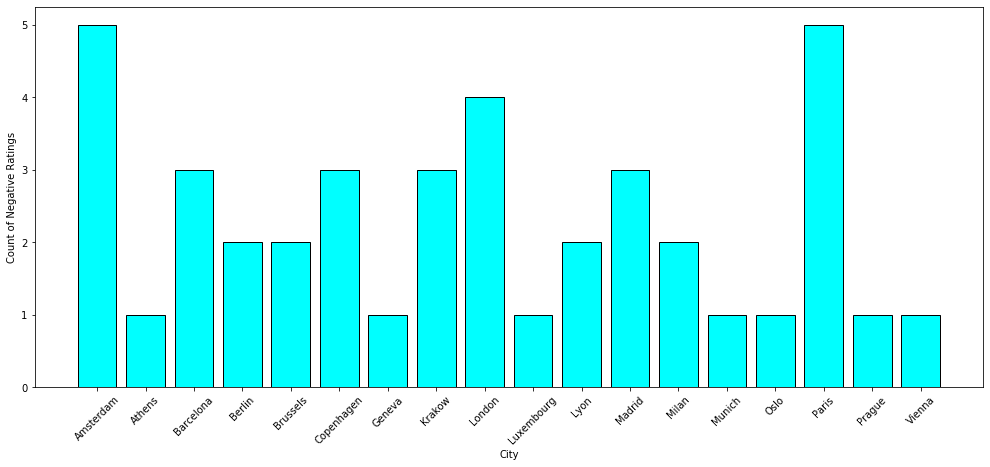

In [96]:
x = list()
y = list()
count = 0
for city in list(df_ppd['City'].unique()):
    count = len(df_ppd[(df_ppd['City'] == city) & (df_ppd['Rating'] < 0)])
    if count > 0:
        y.append(count)
        x.append(city)
    count = 0
fig, ax = plt.subplots(1,1,figsize=(17,7))
ax.bar(x,y,color = 'cyan',edgecolor = 'black')
ax.set_xticklabels(labels = x, rotation = 45)
ax.set_xlabel('City')
ax.set_ylabel('Count of Negative Ratings')

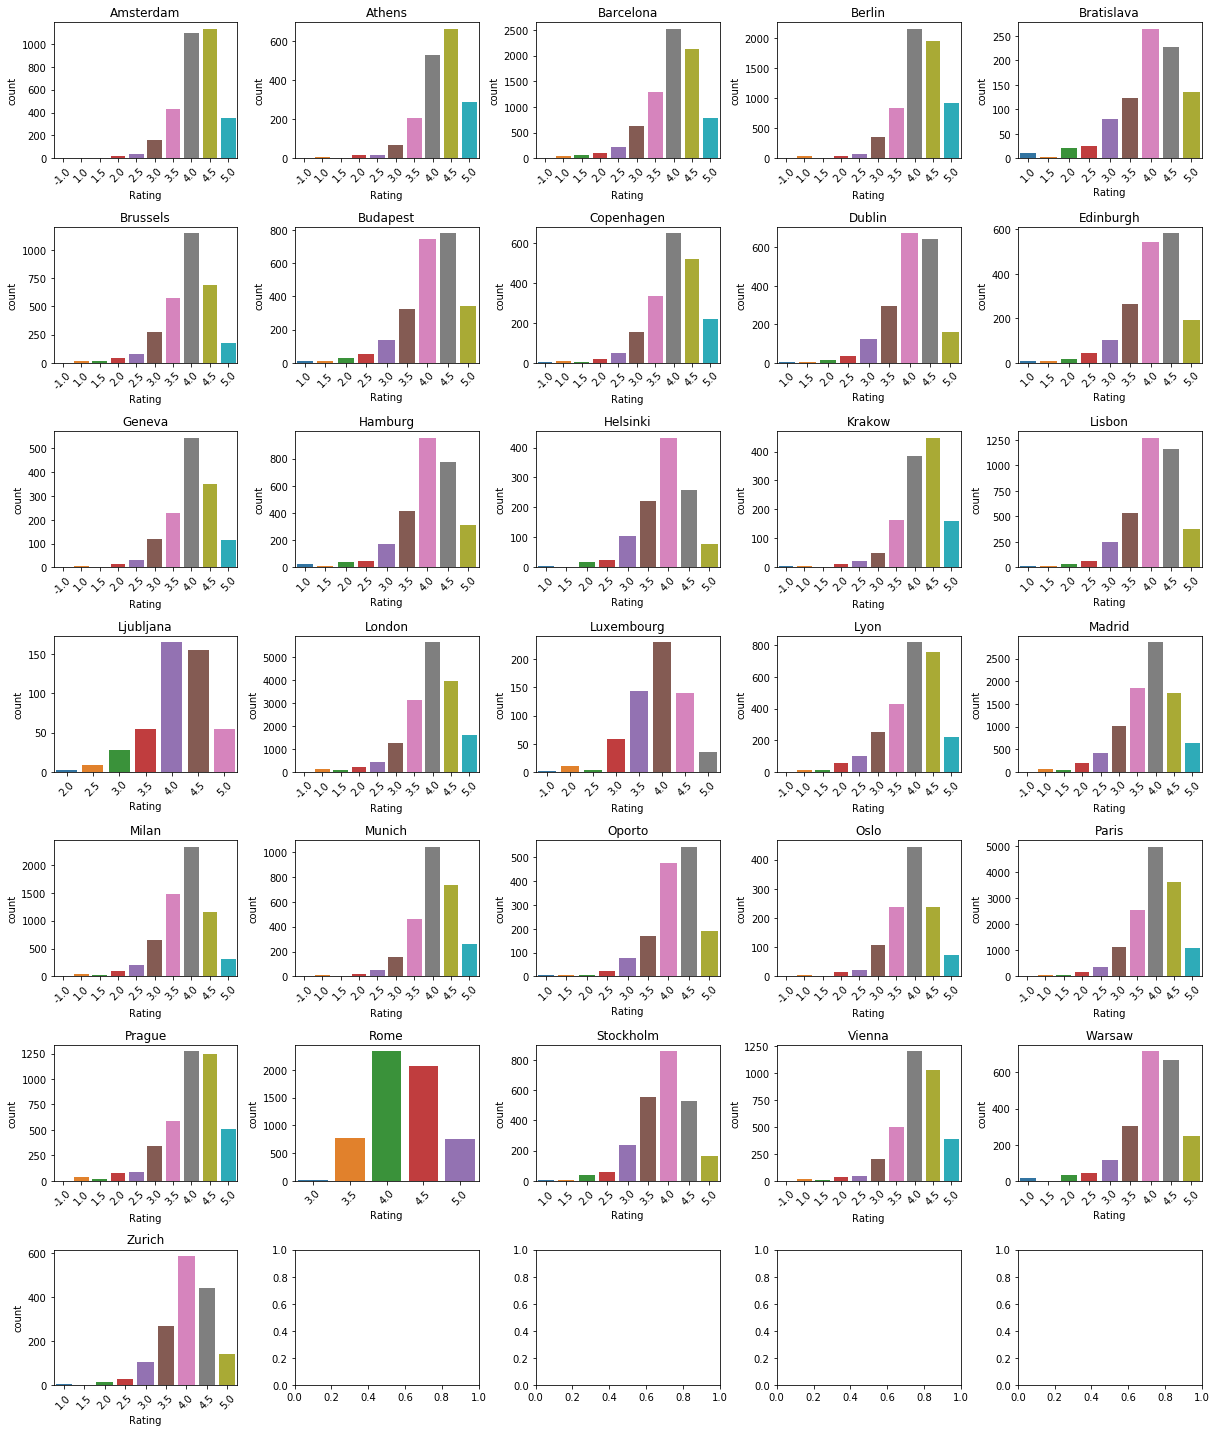

In [97]:
#Ratings count per city


city = list(df_ppd['City'].unique())
fig, axes = plt.subplots(nrows=7,ncols=5,figsize=(17,20))
i = 0
ratings = list(df_ppd['Rating'].unique())
ratingsCount = list()
for c in city:
    reviewsCity = df_ppd[df_ppd['City'] == c]
    plot = sns.countplot(x='Rating', data = reviewsCity, ax=axes.flatten()[i])
    plot.set_title(c)
    plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
    plt.tight_layout()
    i = i + 1    




 All of the cities have majority of their restaurant ratings as "Good" (>4.0 stars)!!!